In [1]:
from sense_experiment import *

False


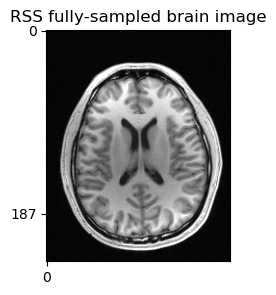

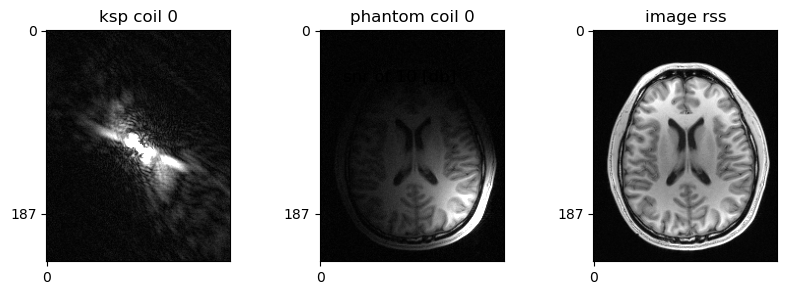

In [4]:
""" Get 256x256 phantom """
snr_db=10; do_phantom=True
data_nm='invivo_brain'#'fastmri_multicoil_brain/file_brain_AXT2_209_6001053.h5'
print(data_nm[-3:]=='.h5')
ksp_fully_sampled = get_dataset(data_nm=data_nm,snr_db=snr_db)
disp(ksp_fully_sampled[...,0],'ksp coil 0',subplt=(1,3,1))
image_coils = bart(1, 'fft -iu 3', ksp_fully_sampled)
disp(image_coils[...,0],'phantom coil 0',subplt=(1,3,2))

image_rss = bart(1,'rss 8',image_coils) # bit-mask of 8 for 4rd dimension
disp(image_rss,'image rss',subplt=(1,3,3))

if do_phantom:
    plt.suptitle('snr of {} [db]'.format(snr_db),y=0.75)
    plt.savefig('phantom_coil_dbSNR{}.png'.format(snr_db))

Doing z usamp: True


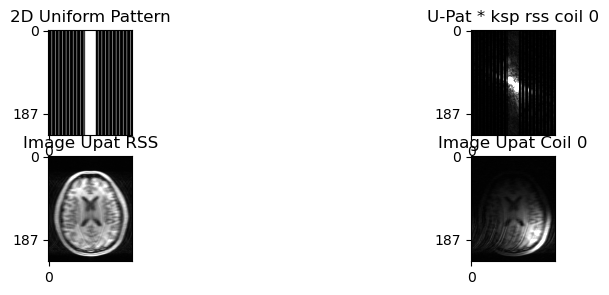

In [5]:
R_p = 8
M,N,_,C=ksp_fully_sampled.shape
upat = gen_upat_2d(M,N,R_p,24,do_z_usamp=True)

disp(upat,'2D Uniform Pattern',subplt=(2,2,1));

ksp_upat = apply_pat(ksp_fully_sampled,upat)
disp(ksp_upat[...,0],'U-Pat * ksp rss coil 0',subplt=(2,2,2))

image_upat_coils = bart(1,'fft -iu 3',ksp_upat)
image_upat_rss = bart(1,'rss 8',image_upat_coils)
disp(image_upat_rss,'Image Upat RSS',subplt=(2,2,3))
disp(image_upat_coils[...,0],'Image Upat Coil 0',subplt=(2,2,4))

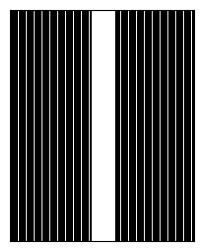

In [7]:
disp(upat,subplt=(1,1,1));
plt.xticks([], [])
plt.yticks([], [])

plt.savefig('upat.png'); 


In [8]:
maps = get_sens_maps(ksp_fully_sampled) # 1 set of sensitivity maps
image_gt = app_sens_maps(image_coils,maps)


Done.


Done.
Replace kspace
lambda = 0.000010, NRMSE = 0.165000
Replace kspace
lambda = 0.000032, NRMSE = 0.165000
Replace kspace
lambda = 0.000100, NRMSE = 0.164000
Replace kspace
lambda = 0.000316, NRMSE = 0.162000
Replace kspace
lambda = 0.001000, NRMSE = 0.156000
Replace kspace
lambda = 0.003162, NRMSE = 0.151000
Replace kspace
lambda = 0.010000, NRMSE = 0.158000
Replace kspace
lambda = 0.031623, NRMSE = 0.180000
Replace kspace
lambda = 0.100000, NRMSE = 0.223000
Replace kspace
lambda = 0.316228, NRMSE = 0.331000
Replace kspace
lambda = 1.000000, NRMSE = 0.548000
38.26650810241699 sec elapsed for do_sense_recon


0.15111408

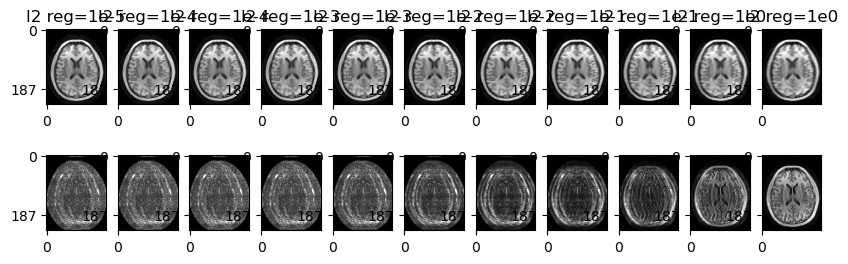

In [11]:
os.environ['OMP_NUM_THREADS'] = str(20)
start = time()
maps,image_l2,fksp_l2,nrmse_out = do_sense_recon( ksp_upat,image_gt ) 
print('{} sec elapsed for do_sense_recon'.format(time()-start))
nrmse_out

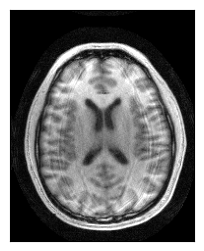

In [13]:
disp(image_l2)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('l2_out.png'); 


Doing z usamp: True
Done.
Replace kspace
lambda = 0.000010, NRMSE = 0.067000
Replace kspace
lambda = 0.000032, NRMSE = 0.066000
Replace kspace
lambda = 0.000100, NRMSE = 0.064000
Replace kspace
lambda = 0.000316, NRMSE = 0.057000
Replace kspace
lambda = 0.001000, NRMSE = 0.038000
Replace kspace
lambda = 0.003162, NRMSE = 0.000000
Replace kspace
lambda = 0.010000, NRMSE = 0.049000
Replace kspace
lambda = 0.031623, NRMSE = 0.100000
Replace kspace
lambda = 0.100000, NRMSE = 0.166000
Replace kspace
lambda = 0.316228, NRMSE = 0.297000
Replace kspace
lambda = 1.000000, NRMSE = 0.532000


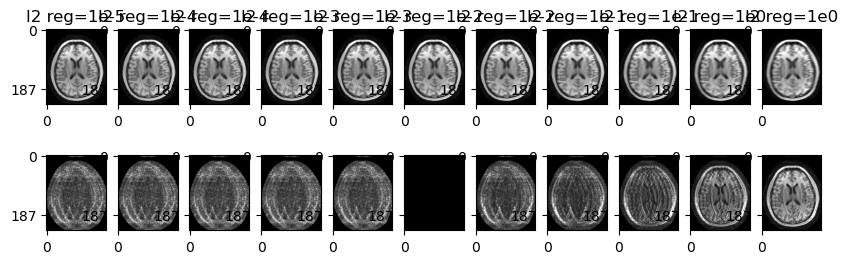

In [14]:
ksp_upat_pro = apply_pat(fksp_l2, gen_upat_2d(M,N,R_p,24,do_z_usamp=True) )
_,image_l2_retro,fksp_l2_retro,nrmse_retro = \
                    do_sense_recon( ksp_upat_pro,image_l2 ) 


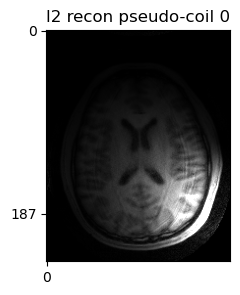

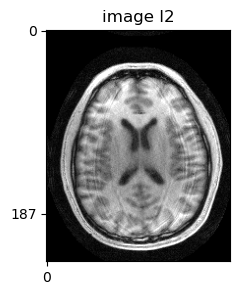

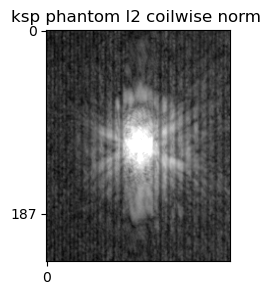

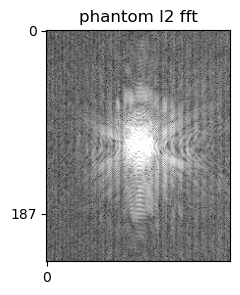

In [15]:
image_l2_coils = image_l2[...,None,None] * maps
disp(image_l2_coils[...,0],'l2 recon pseudo-coil 0')

disp(image_l2,'image l2')

ksp_l2_coils = bart(1,'fft -u 3',image_l2_coils)
disp(np.linalg.norm(ksp_l2_coils,axis=3)**0.2,'ksp phantom l2 coilwise norm ')

disp(bart(1,'fft -u 3',image_l2)**0.2,'phantom l2 fft')

Done.
(236, 188, 1, 32)
30.931376390705697


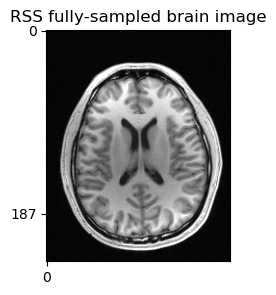

In [16]:
ksp_fully_sampled = get_dataset(data_nm,snr_db=30)
M,N,_,C=(np.shape(ksp_fully_sampled))
maps = get_sens_maps(ksp_fully_sampled) # 1 set of sensitivity maps
image_coils = bart(1, 'fft -iu 3', ksp_fully_sampled)
print(image_coils.shape)
est_snr_db = 20*np.log10(np.percentile(np.abs(image_coils),99)/np.std(image_coils[:10,:10,0,0].real)/np.sqrt(2))
print(est_snr_db)


(128, 128, 1, 8)

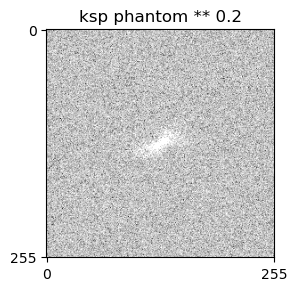

In [17]:
ksp_fully_sampled = get_dataset('bart_phantom',snr_db=0)
M,N,_,C = ksp_fully_sampled.shape
ksp_fully_sampled = ksp_fully_sampled[int(M/4):int(3*M/4),int(N/4):int(3*N/4),...]
ksp_fully_sampled.shape

In [ ]:
from sense_experiment import *
# fast_files = glob('fastmri_multicoil_brain/*.h5')[:100]
# with Pool(100) as P:
#     out = list(P.imap(fn_param_sense_exper,fast_files))
# with Pool(100) as P:
#     out = list(P.imap(snr_param_phantom_exper,[5]*25+[10]*25+[15]*25+[20]*25))
out = pro_retro_sense_experiment(fn_out='invivo_brain', data_nm='invivo_brain')

In [35]:
nrmse_mat.shape

(3, 8, 75)

In [45]:
prob_run = [i for i in range(nrmse_mat.shape[2]) if nrmse_mat[0,0,i]>=1.9]
print(prob_run)

[]


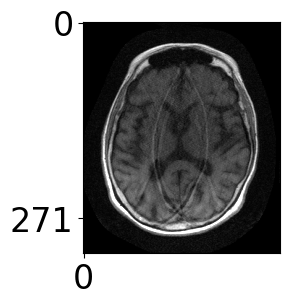

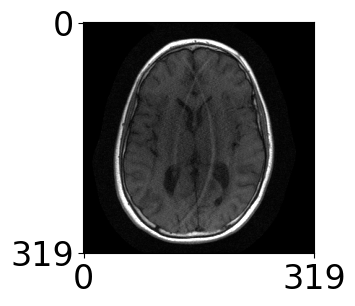

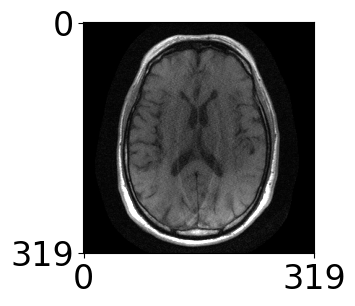

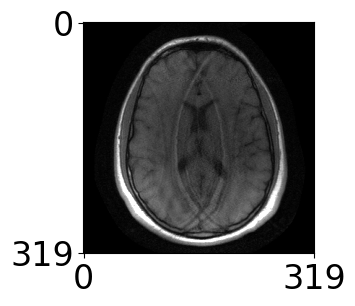

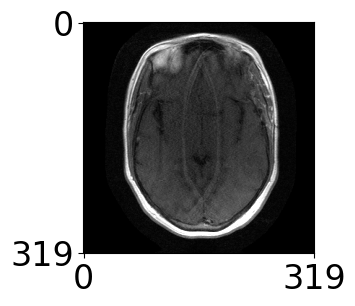

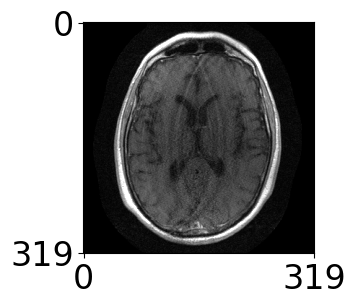

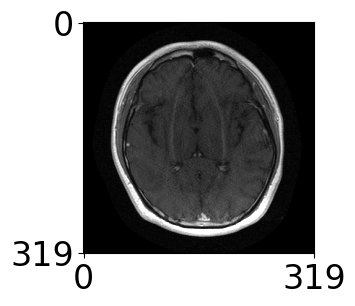

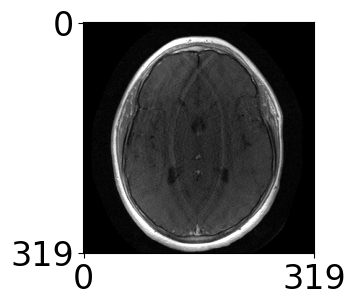

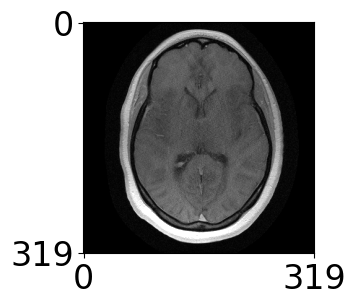

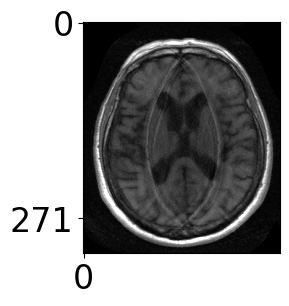

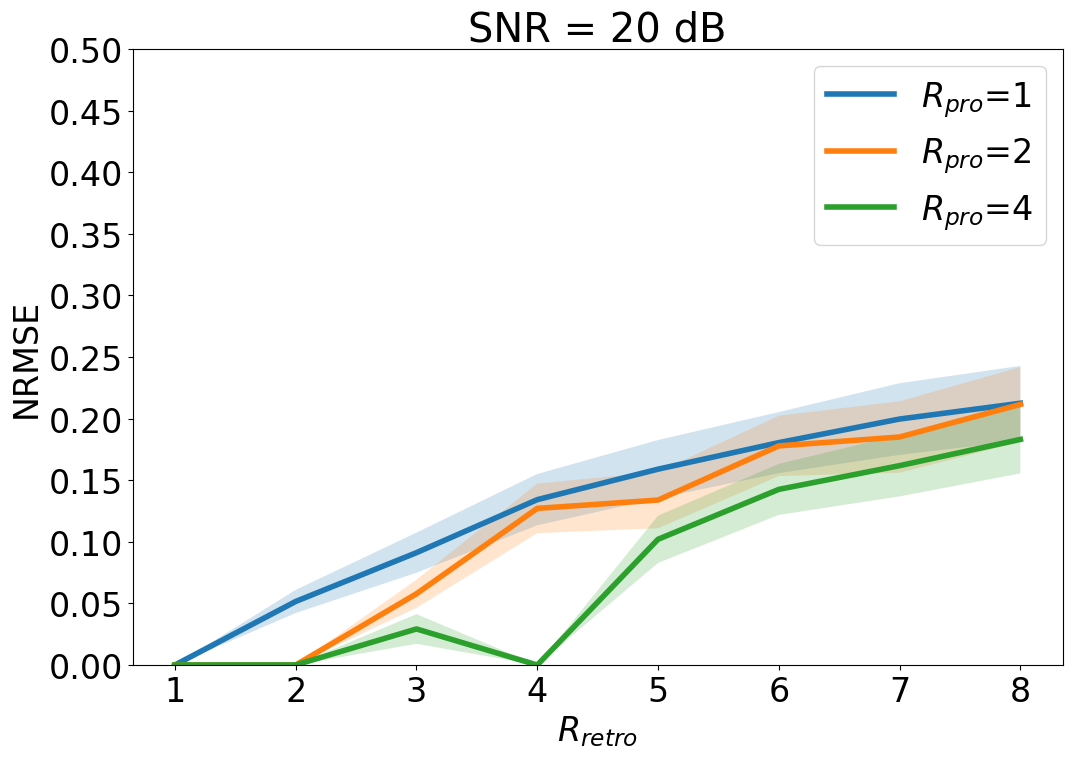

In [63]:
out_files_1 = glob('sense_experiment_out/'+'*AXT1*nrmse.npy')
out_files_2 = glob('sense_experiment_out/'+'*AXT2*nrmse.npy')
out_files = out_files_1+out_files_2
out_files = out_files[:10]
# out_files = ['./invivo_brain_nrmse.npy']
# out_files = glob('phantom_experiment_out/'+'snrdb{}*_nrmse.npy'.format(snr_val))[:]

ftsz = 24
snr_val = 20
if True:
    r_retro_vec = np.r_[1:9:1]
    r_pro_vec=[1,2,4]
    
    N_r = len(r_retro_vec); N_p = len(r_pro_vec)
    nrmse_mat = 100*np.ones([N_p,N_r,len(out_files)])
    for k_of,of in enumerate(out_files):
        
        nrmse_curr = np.load(of)
        nrmse_mat[...,k_of] = nrmse_curr
        images_out = np.load(of[:-10]+'_images_l2.npy')
#         disp(images_out[2,3])
    
    
    plt.figure(figsize=(12,8))
    plt.plot(r_retro_vec,np.mean(nrmse_mat,axis=2).T,linewidth=4)
    
    avg_plt = np.mean(nrmse_mat,axis=2).T
    error_plt = np.std(nrmse_mat,axis=2).T
    for j in range(avg_plt.shape[1]):
        plt.fill_between(r_retro_vec, avg_plt[:,j]-1*error_plt[:,j], avg_plt[:,j]+1*error_plt[:,j],alpha=0.2)
    
    plt.rc('font', size=ftsz)
    plt.xticks(r_retro_vec, size=ftsz); plt.yticks(np.r_[0:0.8:0.05],size=ftsz);
    plt.legend(['$R_{pro}$' +'={}'.format(r_pro) if r_pro>1 else '$R_{pro}$' +'={}'.format(r_pro) for r_pro in r_pro_vec],fontsize=ftsz);
    plt.xlabel('$R_{retro}$',size=ftsz)
    plt.ylabel('NRMSE',size=ftsz);plt.ylim([0, 0.5]);
    plt.title('SNR = {} dB'.format(snr_val))
#     plt.title('NRMSE at varying $R_{pro}$, $R_{retro}$ for 300 fastMRI slices')

    plt.savefig('figures/fastMRI_result.png'.format(snr_val)); 


R_pro = 1,R_retro = 3: NRMSE =  0.112
R_pro = 2,R_retro = 3: NRMSE =  0.072
R_pro = 4,R_retro = 3: NRMSE =  0.028


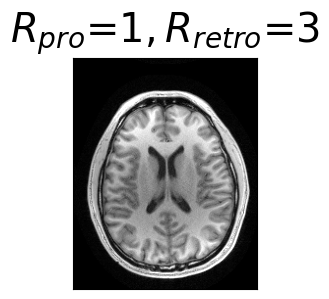

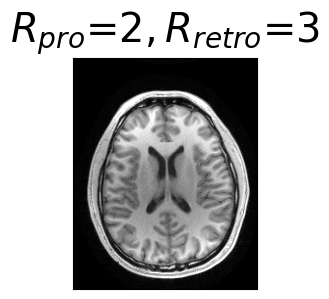

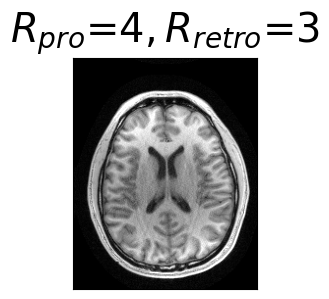

In [59]:
invivo_imgs = np.load('invivo_brain_images_l2.npy');#np.load('phantom_experiment_out/snrdb20_2854656_images_l2.npy')
invivo_imgs.shape
for i in range(3):
    for j in [2]:
        disp(invivo_imgs[i,j,...])
        plt.xticks([], [])
        plt.yticks([], [])
        plt.title('$R_{pro}$'+'={}'.format(r_pro_vec[i])+'$, R_{retro}$'+'={}'.format(r_retro_vec[j]))
        plt.savefig('phantom_for_Rp{}Rr{}.png'.format(r_pro_vec[i],r_retro_vec[j]),transparent=True); 
        print('R_pro = {},R_retro = {}: NRMSE = '.format(r_pro_vec[i],r_retro_vec[j]),np.round(nrmse_mat[i,j,0],3))